Till now we have worked with RGB color spaces. RGB is quite old. In the 1970's there were 2 other alternative color models developed namely : ***HSL(Hue, saturation, lightness) and HSV(Hue, saturation, value)***.

HSL and HSV are more closely aligned with the way human vision actually perceives color. 

## RGB:

![i](https://i.imgur.com/q0GuSt8.jpg)

## HSL:

Hue - Around the cylinder there are going to be different colors such as red, green , blue i.e. the actual hue we are looking for.

Saturation - How much of the hue we end up having

Lightness - How light or dark it is. At the top of the cylinder, it is pure white and at the bottom of the cylinder it is pure black i.e. no lightness in the color regardless of it's saturation or hue.

![i](https://i.imgur.com/ctqfbuB.jpg)

## HSV:

Instead of having lightness as seen above in HSL model, we have values. No saturation of any hue by default is going to be white since white color is at the center of the cylinder.

![i](https://i.imgur.com/yuY1m2o.jpg)



In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('room_ser.jpg')

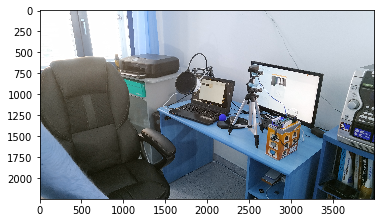

In [3]:
plt.imshow(img)

## COnverting BGR to RGB

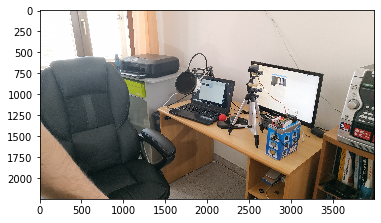

In [5]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

## COnverting RBG Image to HSV Image

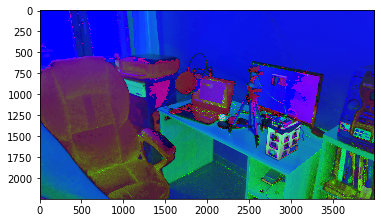

In [7]:
img1 = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
plt.imshow(img1)

## COnverting RGB to HLS

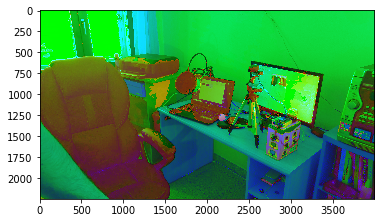

In [11]:
img2 = cv2.cvtColor(img,cv2.COLOR_RGB2HLS)
plt.imshow(img2)

## Blending and Pasting Images

Blending images is done using addWeighted function that uses both images and combines weight attached to each image or each image pixel, adds them together and that results in the new pixel.

![i](https://i.imgur.com/hik1EzL.jpg)

We can choose to either make image 1 more prominent or image 2 more prominent and for doing it we can alter the values of alpha and beta. 

In [12]:
img1 = cv2.imread('DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

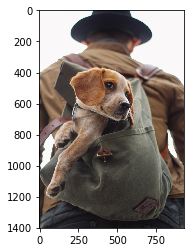

In [13]:
plt.imshow(img1)

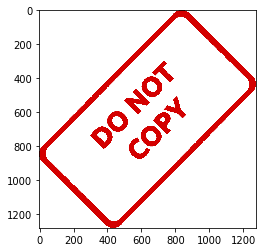

In [14]:
plt.imshow(img2)

In [16]:
img1.shape

(1401, 934, 3)

In [17]:
img2.shape

(1280, 1277, 3)

In [20]:
## Making the sizes of both the images as same

img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2,(1200,1200))

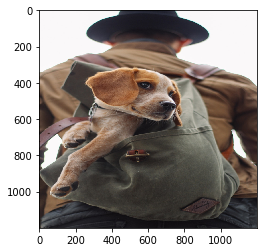

In [21]:
plt.imshow(img1)

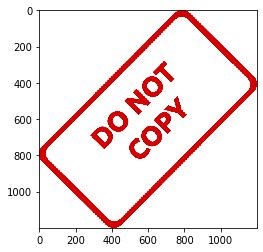

In [22]:
plt.imshow(img2)

In [23]:
# Using the formula we discussed above, we are going to use it and blend the two images together
blended = cv2.addWeighted(img1,0.5,img2,0.5,0) # The addWeighted function only works when the images are both of the same size

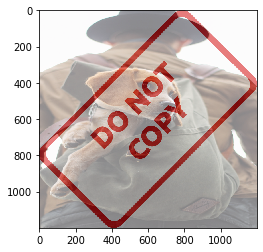

In [24]:
plt.imshow(blended)

In [30]:
blended1 = cv2.addWeighted(img1,0.8,img2,0.1,10)

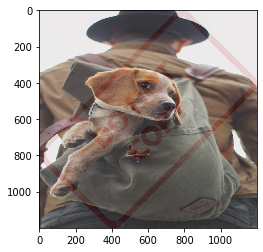

In [31]:
plt.imshow(blended1)

In [32]:
# Overlay small image on top of a larger image(no blending)
import numpy as np
img1 = cv2.imread('DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

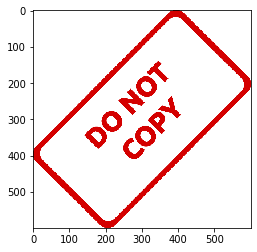

In [33]:
img2 = cv2.resize(img2,(600,600))
plt.imshow(img2)

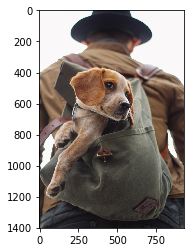

In [34]:
plt.imshow(img1)

In [35]:
large_img = img1
small_img = img2

x_offset = 0 
y_offset = 0

In [36]:
x_end = x_offset+small_img.shape[1]
y_end = y_offset+small_img.shape[0]

In [37]:
large_img[y_offset:y_end,x_offset:x_end] = small_img

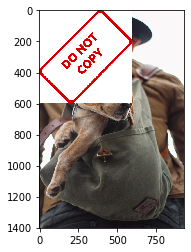

In [38]:
plt.imshow(large_img)

In [39]:
# Blending images together of different sizes
img1 = cv2.imread('DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [41]:
img2 = cv2.resize(img2,(600,600))

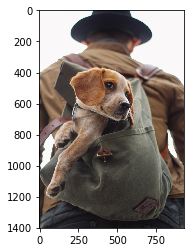

In [42]:
plt.imshow(img1)

In [43]:
img1.shape

(1401, 934, 3)

In [44]:
img2.shape

(600, 600, 3)

In [45]:
x_offset = 934-600
y_offset = 1401 - 600

In [46]:
rows,columns,channels = img2.shape

In [47]:
rows

600

In [48]:
columns

600

In [50]:
channels

3

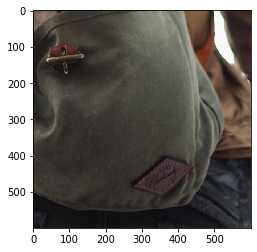

In [51]:
roi = img1[y_offset:1401,x_offset:943] # y is before x since for numpy the orientation is different it interprets images in rows and columns
plt.imshow(roi)

In [56]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)

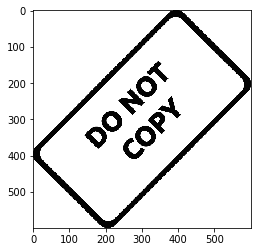

In [57]:
plt.imshow(img2gray,cmap = 'gray')

In [58]:
mask_inv = cv2.bitwise_not(img2gray) # Inverts every bit of an array

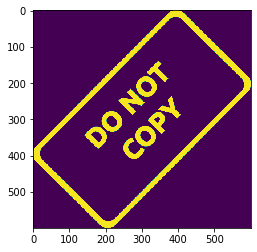

In [61]:
plt.imshow(mask_inv)

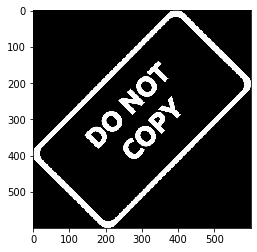

In [62]:
plt.imshow(mask_inv,cmap='gray')

In [63]:
mask_inv.shape # DOes not contain color channels

(600, 600)

In [64]:
import numpy as np
white_background = np.full(img2.shape,255,dtype=np.uint8)

In [65]:
white_background.shape

(600, 600, 3)

In [66]:
bk = cv2.bitwise_or(white_background,white_background,mask = mask_inv)

In [67]:
bk.shape

(600, 600, 3)

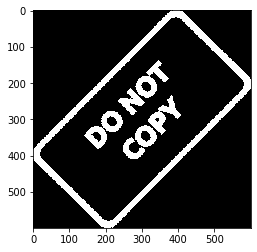

In [69]:
plt.imshow(bk) # Now even after inversing img2 has 3 dimensions and we got the 3 channels back again

In [70]:
fg =cv2.bitwise_or(img2,img2,mask=mask_inv)

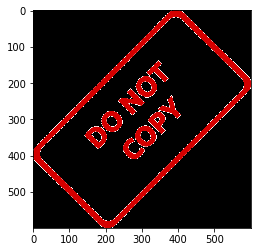

In [71]:
plt.imshow(fg)

In [77]:
final_roi = cv2.bitwise_or(roi,fg)

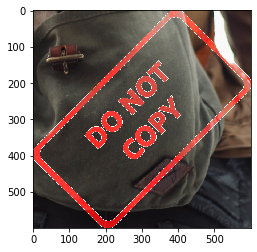

In [73]:
plt.imshow(final_roi)

In [78]:
large_img = img1
small_img = final_roi

In [75]:
large_img[y_offset:y_offset+small_img.shape[0],x_offset:x_offset+small_img.shape[1]] = small_img

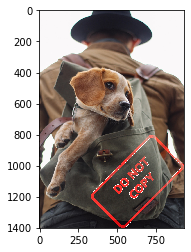

In [76]:
plt.imshow(large_img)